<a href="https://colab.research.google.com/github/mouhamedmarega/Python-Projects/blob/main/NYPD_Arrest_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd

In [27]:
import numpy as np

In [28]:
import matplotlib.pyplot as plot

In [29]:
import seaborn as sns

In [30]:
import calendar

In [31]:
#from encodings.aliases import aliases # Python has a file containing a dictionary of encoding names and associated aliases


In [32]:
# the matplotlib plots will appear directly below the cell in which the plot function was called.
%matplotlib inline

# **Read in the csv files and remove duplicates**

In [33]:
nypdarrest = pd.read_csv("/content/NYPD_Arrest_Data__Year_to_Date_.csv")

In [34]:
nypdarrest.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Zip Codes
0,263238742,02/08/2023,380.0,"ROBBERY,CAR JACKING",105.0,ROBBERY,PL 1601003,F,K,62,...,989904,156928,40.597407,-73.979638,POINT (-73.979638 40.597407),1.0,2.0,45.0,37.0,18183.0
1,265590985,03/24/2023,155.0,RAPE 2,104.0,RAPE,PL 1303001,F,S,120,...,962873,174172,40.644721,-74.077033,POINT (-74.0770327198983 40.6447209438691),4.0,1.0,13.0,74.0,10369.0
2,265798132,03/28/2023,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,S,120,...,962873,174172,40.644721,-74.077033,POINT (-74.0770327198983 40.6447209438691),4.0,1.0,13.0,74.0,10369.0
3,269233687,06/02/2023,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,110,...,1019164,210169,40.743481,-73.874004,POINT (-73.8740035373971 40.7434812638841),66.0,3.0,5.0,68.0,14784.0
4,270519574,06/28/2023,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,84,...,988902,192641,40.695439,-73.983225,POINT (-73.9832253756043 40.6954388081238),68.0,2.0,48.0,54.0,16865.0


In [35]:
nypdarrest.shape ## Checking the shape of the data. It has 319,073 rows and 17 columns

(112571, 24)

In [36]:
nypdarrest.duplicated().sum() # Counting the duplicate rows

0

# **Explore the dataset**

In [37]:
nypdarrest.head() # Quick check of the beginning of the dataframe

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Zip Codes
0,263238742,02/08/2023,380.0,"ROBBERY,CAR JACKING",105.0,ROBBERY,PL 1601003,F,K,62,...,989904,156928,40.597407,-73.979638,POINT (-73.979638 40.597407),1.0,2.0,45.0,37.0,18183.0
1,265590985,03/24/2023,155.0,RAPE 2,104.0,RAPE,PL 1303001,F,S,120,...,962873,174172,40.644721,-74.077033,POINT (-74.0770327198983 40.6447209438691),4.0,1.0,13.0,74.0,10369.0
2,265798132,03/28/2023,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,S,120,...,962873,174172,40.644721,-74.077033,POINT (-74.0770327198983 40.6447209438691),4.0,1.0,13.0,74.0,10369.0
3,269233687,06/02/2023,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,110,...,1019164,210169,40.743481,-73.874004,POINT (-73.8740035373971 40.7434812638841),66.0,3.0,5.0,68.0,14784.0
4,270519574,06/28/2023,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,84,...,988902,192641,40.695439,-73.983225,POINT (-73.9832253756043 40.6954388081238),68.0,2.0,48.0,54.0,16865.0


In [38]:
nypdarrest.tail() # Quick check of the end of the dataframe

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Zip Codes
112566,267861068,05/07/2023,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL05110MU,M,Q,113,...,1046315,187088,40.679981,-73.776234,POINT (-73.7762339071953 40.6799807384666),41.0,3.0,6.0,71.0,24669.0
112567,270481110,06/27/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,79,...,999872,187803,40.682141,-73.943673,POINT (-73.943673 40.682141),69.0,2.0,49.0,51.0,17618.0
112568,267833542,05/06/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601502,F,B,43,...,1019852,241853,40.830435,-73.871349,POINT (-73.871349 40.830435),58.0,5.0,31.0,26.0,11610.0
112569,268911088,05/27/2023,494.0,"STOLEN PROPERTY 2,1,POSSESSION",111.0,POSSESSION OF STOLEN PROPERTY,PL 1654502,F,B,46,...,1011750,250274,40.853578,-73.900591,POINT (-73.900591 40.853578),6.0,5.0,22.0,29.0,10935.0
112570,269584440,06/09/2023,439.0,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553001,F,M,24,...,993372,229301,40.796050,-73.967052,POINT (-73.967052 40.79605),20.0,4.0,23.0,15.0,12422.0


In [40]:
nypdarrest.info() # Summary information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112571 entries, 0 to 112570
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                112571 non-null  int64  
 1   ARREST_DATE               112571 non-null  object 
 2   PD_CD                     112110 non-null  float64
 3   PD_DESC                   112571 non-null  object 
 4   KY_CD                     112105 non-null  float64
 5   OFNS_DESC                 112571 non-null  object 
 6   LAW_CODE                  112571 non-null  object 
 7   LAW_CAT_CD                111725 non-null  object 
 8   ARREST_BORO               112571 non-null  object 
 9   ARREST_PRECINCT           112571 non-null  int64  
 10  JURISDICTION_CODE         112571 non-null  int64  
 11  AGE_GROUP                 112571 non-null  object 
 12  PERP_SEX                  112571 non-null  object 
 13  PERP_RACE                 112571 non-null  o

In [41]:
# Changing the data type from object to datetime for the OCCURRED_ON_DATE column
nypdarrest.ARREST_DATE = pd.to_datetime(nypdarrest.ARREST_DATE)

In [42]:
# Check if it worked
nypdarrest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112571 entries, 0 to 112570
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ARREST_KEY                112571 non-null  int64         
 1   ARREST_DATE               112571 non-null  datetime64[ns]
 2   PD_CD                     112110 non-null  float64       
 3   PD_DESC                   112571 non-null  object        
 4   KY_CD                     112105 non-null  float64       
 5   OFNS_DESC                 112571 non-null  object        
 6   LAW_CODE                  112571 non-null  object        
 7   LAW_CAT_CD                111725 non-null  object        
 8   ARREST_BORO               112571 non-null  object        
 9   ARREST_PRECINCT           112571 non-null  int64         
 10  JURISDICTION_CODE         112571 non-null  int64         
 11  AGE_GROUP                 112571 non-null  object        
 12  PE

In [19]:
# easily extract datetime information frome the OCCURRED_ON_DATE column
nypdarrest.ARREST_DATE.dt.year

0         2023
1         2023
2         2023
3         2023
4         2023
          ... 
112566    2023
112567    2023
112568    2023
112569    2023
112570    2023
Name: ARREST_DATE, Length: 112571, dtype: int64

In [44]:
nypdarrest.ARREST_DATE.dt.month

0         2
1         3
2         3
3         6
4         6
         ..
112566    5
112567    6
112568    5
112569    5
112570    6
Name: ARREST_DATE, Length: 112571, dtype: int64

In [46]:
nypdarrest.describe() # summary information on the numeric columns

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Zip Codes
count,1.125710e+05,112110.000000,112105.000000,112571.000000,112571.000000,1.125710e+05,112571.000000,112571.000000,112571.000000,112558.000000,112555.000000,112558.000000,112558.000000,112334.000000
mean,2.660418e+08,425.562858,249.999661,63.495527,0.969983,1.005906e+06,208392.858933,40.738258,-73.921137,36.898612,3.338812,27.451412,39.099700,14524.958757
std,2.753893e+06,276.238688,147.860807,34.516551,7.865727,2.159455e+04,29807.535869,0.146405,0.233432,21.005311,1.227511,14.504522,21.403418,3921.571464
min,2.611809e+08,12.000000,101.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-74.251844,1.000000,1.000000,1.000000,1.000000,10090.000000
25%,2.636706e+08,114.000000,113.000000,40.000000,0.000000,9.916100e+05,186140.000000,40.677546,-73.973423,17.000000,2.000000,13.000000,23.000000,11606.000000
50%,2.661411e+08,397.000000,236.000000,63.000000,0.000000,1.005680e+06,206647.000000,40.733876,-73.922631,41.000000,3.000000,29.000000,37.000000,13094.000000
75%,2.684515e+08,705.000000,344.000000,101.000000,0.000000,1.017925e+06,236537.000000,40.815904,-73.878395,55.000000,4.000000,40.000000,59.000000,17213.000000
max,2.706613e+08,997.000000,995.000000,123.000000,97.000000,1.066940e+06,271819.000000,40.912714,0.000000,71.000000,5.000000,51.000000,77.000000,24894.000000


In [47]:
nypdarrest.describe(include='object') # summary information on the non-numeric columns

,PD_DESC,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,New Georeferenced Column
count,112571,112571,112571,111725,112571,112571,112571,112571,112571
unique,233,63,923,5,5,5,3,7,26963
top,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,PL 1552500,M,K,25-44,M,BLACK,POINT (-73.881509 40.671404)
freq,12104,16619,12027,62259,31104,64823,90596,54083,769


In [48]:
nypdarrest.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column',
       'Community Districts', 'Borough Boundaries', 'City Council Districts',
       'Police Precincts', 'Zip Codes'],
      dtype='object')

In [49]:
nypdarrest.columns[np.sum(nypdarrest.isnull()) != 0]

Index(['PD_CD', 'KY_CD', 'LAW_CAT_CD', 'Community Districts',
       'Borough Boundaries', 'City Council Districts', 'Police Precincts',
       'Zip Codes'],
      dtype='object')

In [50]:
# Checking for columns with missing values
nypdarrest.columns[np.sum(nypdarrest.isnull()) != 0]

Index(['PD_CD', 'KY_CD', 'LAW_CAT_CD', 'Community Districts',
       'Borough Boundaries', 'City Council Districts', 'Police Precincts',
       'Zip Codes'],
      dtype='object')

In [51]:
# Checking for columns with no missing values
nypdarrest.columns[np.sum(nypdarrest.isnull()) == 0]

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_DESC', 'OFNS_DESC', 'LAW_CODE',
       'ARREST_BORO', 'ARREST_PRECINCT', 'JURISDICTION_CODE', 'AGE_GROUP',
       'PERP_SEX', 'PERP_RACE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [52]:
# Checking for the number of unique values in each column
for col in nypdarrest.columns:
    unique_count = nypdarrest[col].nunique()
    print(col + " has " + str(unique_count) + " unique values")

ARREST_KEY has 112571 unique values
ARREST_DATE has 181 unique values
PD_CD has 243 unique values
PD_DESC has 233 unique values
KY_CD has 66 unique values
OFNS_DESC has 63 unique values
LAW_CODE has 923 unique values
LAW_CAT_CD has 5 unique values
ARREST_BORO has 5 unique values
ARREST_PRECINCT has 77 unique values
JURISDICTION_CODE has 22 unique values
AGE_GROUP has 5 unique values
PERP_SEX has 3 unique values
PERP_RACE has 7 unique values
X_COORD_CD has 22160 unique values
Y_COORD_CD has 23202 unique values
Latitude has 26457 unique values
Longitude has 26469 unique values
New Georeferenced Column has 26963 unique values
Community Districts has 71 unique values
Borough Boundaries has 5 unique values
City Council Districts has 51 unique values
Police Precincts has 77 unique values
Zip Codes has 205 unique values


# **Let's answer some questions**

In [53]:
# What are the most common crimes in terms of offense group?
nypdarrest.OFNS_DESC.value_counts()

ASSAULT 3 & RELATED OFFENSES      16619
PETIT LARCENY                     12070
FELONY ASSAULT                    10474
DANGEROUS DRUGS                    7530
MISCELLANEOUS PENAL LAW            7327
                                  ...  
PARKING OFFENSES                      3
FELONY SEX CRIMES                     2
DISRUPTION OF A RELIGIOUS SERV        2
UNLAWFUL POSS. WEAP. ON SCHOOL        1
ADMINISTRATIVE CODES                  1
Name: OFNS_DESC, Length: 63, dtype: int64

In [102]:
nypdarrest.OFNS_DESC.value_counts()[:10]

ASSAULT 3 & RELATED OFFENSES      16619
PETIT LARCENY                     12070
FELONY ASSAULT                    10474
DANGEROUS DRUGS                    7530
MISCELLANEOUS PENAL LAW            7327
VEHICLE AND TRAFFIC LAWS           6612
CRIMINAL MISCHIEF & RELATED OF     5515
ROBBERY                            5368
GRAND LARCENY                      5074
DANGEROUS WEAPONS                  4639
Name: OFNS_DESC, dtype: int64

<Axes: title={'center': 'Types of Crimes'}>

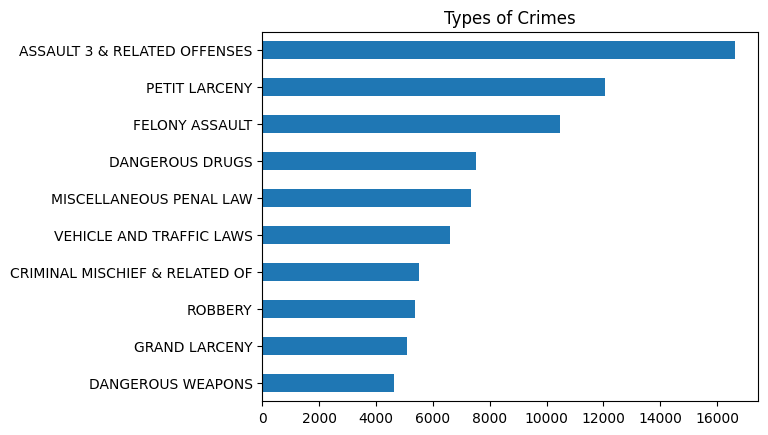

In [57]:
#With barh chart representation
nypdarrest.OFNS_DESC.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Types of Crimes")

In [55]:
nypdarrest.shape[0]

112571

ASSAULT 3 & RELATED OFFENSES      0.147631
PETIT LARCENY                     0.107221
FELONY ASSAULT                    0.093044
DANGEROUS DRUGS                   0.066891
MISCELLANEOUS PENAL LAW           0.065088
VEHICLE AND TRAFFIC LAWS          0.058736
CRIMINAL MISCHIEF & RELATED OF    0.048991
ROBBERY                           0.047685
GRAND LARCENY                     0.045074
DANGEROUS WEAPONS                 0.041210
Name: OFNS_DESC, dtype: float64

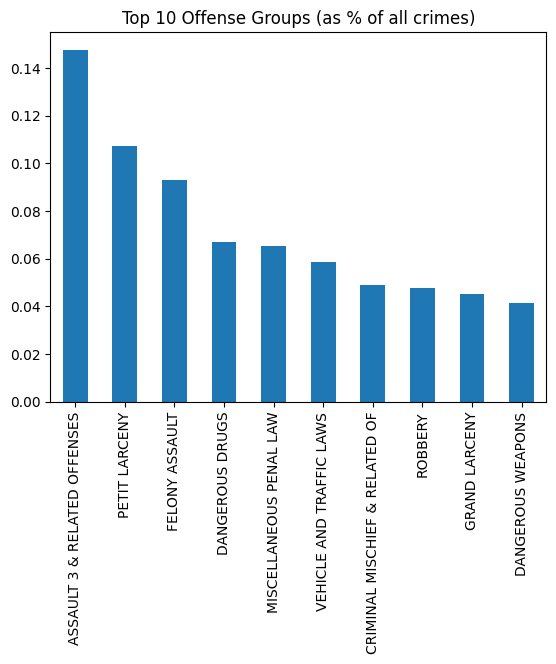

In [61]:
crime_offense_vals = nypdarrest.OFNS_DESC.value_counts()[:10]

display(crime_offense_vals / nypdarrest.shape[0])

# Creating a bar chart of the Top 10 offense groups as %
(crime_offense_vals / nypdarrest.shape[0]).plot(kind='bar');
plot.title('Top 10 Offense Groups (as % of all crimes)');

In [63]:
# What are the least common offense groups?
nypdarrest.OFNS_DESC.value_counts().sort_values(ascending=True)[:10]

ADMINISTRATIVE CODES                 1
UNLAWFUL POSS. WEAP. ON SCHOOL       1
FELONY SEX CRIMES                    2
DISRUPTION OF A RELIGIOUS SERV       2
PARKING OFFENSES                     3
ESCAPE 3                             4
KIDNAPPING                           6
OTHER STATE LAWS (NON PENAL LAW)     6
ANTICIPATORY OFFENSES               11
MOVING INFRACTIONS                  14
Name: OFNS_DESC, dtype: int64

ADMINISTRATIVE CODES                0.000009
UNLAWFUL POSS. WEAP. ON SCHOOL      0.000009
FELONY SEX CRIMES                   0.000018
DISRUPTION OF A RELIGIOUS SERV      0.000018
PARKING OFFENSES                    0.000027
ESCAPE 3                            0.000036
KIDNAPPING                          0.000053
OTHER STATE LAWS (NON PENAL LAW)    0.000053
ANTICIPATORY OFFENSES               0.000098
MOVING INFRACTIONS                  0.000124
Name: OFNS_DESC, dtype: float64

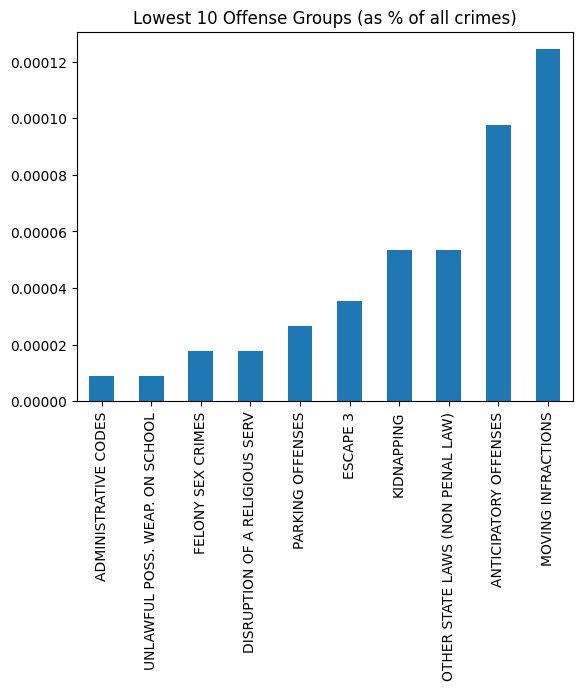

In [64]:
crime_with_least_offense_vals = nypdarrest.OFNS_DESC.value_counts().sort_values(ascending=True)[:10]

display(crime_with_least_offense_vals / nypdarrest.shape[0])

# Creating a bar chart of the Top 10 least offense groups as %
(crime_with_least_offense_vals / nypdarrest.shape[0]).plot(kind='bar');
plot.title('Lowest 10 Offense Groups (as % of all crimes)');

In [65]:
#I am using the following command to change the date data type from object to datetime and extract the month and year.

nypdarrest['ARREST_DATE'] = pd.to_datetime(nypdarrest['ARREST_DATE'])
nypdarrest['year'] = pd.DatetimeIndex(nypdarrest['ARREST_DATE']).year
nypdarrest['month'] = pd.DatetimeIndex(nypdarrest['ARREST_DATE']).month

In [68]:
# In which month were the most crimes committed?

#I apply the replace function to change the month digits to names. Also applied the "inplace = True" function to overrite the data permenantly.
nypdarrest.replace({'month': {1:' January', 2: 'February',3:' March',4:' Avril',5:' May', 6:' June'}}, inplace=True)

In [90]:
#Total arrest made by month
nypdarrest.groupby('month').count()['ARREST_KEY']

month
 Avril      18302
 January    18815
 June       19488
 March      19029
 May        20196
February    16741
Name: ARREST_KEY, dtype: int64

<Axes: title={'center': 'Total Arrest by Month'}, xlabel='month'>

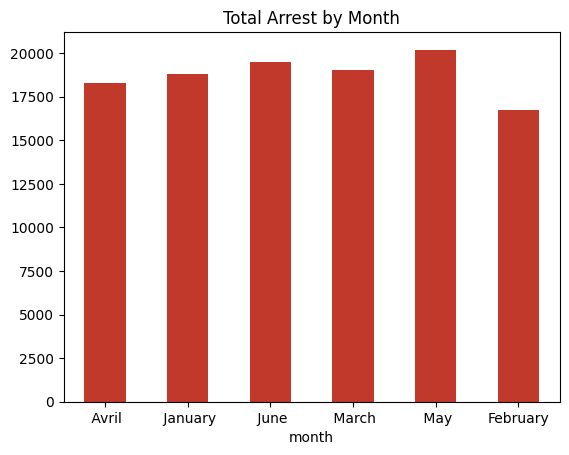

In [69]:
nypdarrest.groupby('month').size().plot(kind = 'bar', title ='Total Arrest by Month', color = '#C0392B',rot=0)

<Axes: title={'center': 'Total Arrest made by Month'}>

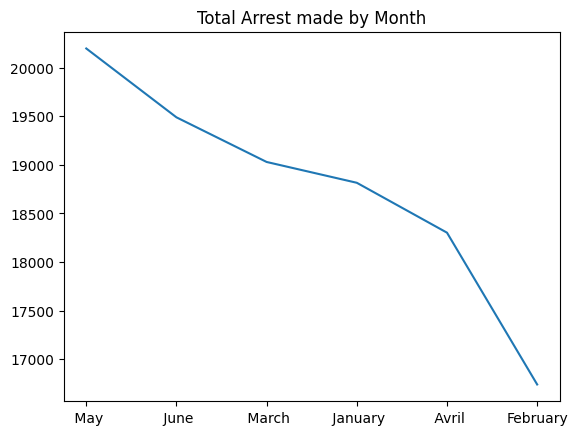

In [105]:
nypdarrest['month'].value_counts().plot(kind="line", title = "Total Arrest made by Month")

In [106]:
# In which months were the number of crimes below average?
# In which months on average did the most crimes occur?
# if the value is less than the average crime per month, highlight the value in blue

avg_offense = nypdarrest.groupby(['year', 'month']).count()['ARREST_KEY'].mean()
print("The average number of arrest made is " + str(avg_offense))

year_and_month = nypdarrest.groupby(['year', 'month']).count()['ARREST_KEY'].unstack()

def style_negative(v, props=''):
    return props if v < avg_offense else None
s2 = year_and_month.style.applymap(style_negative, props='color:blue;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)
s2

The average number of arrest made is 18761.833333333332


month,Avril,January,June,March,May,February
year,,,,,,
2023,18302,18815,19488,19029,20196,16741


In [84]:
#what is the monthly offense number by borough?

boro_monthly_offense = nypdarrest.groupby(['ARREST_BORO','month']).count()['ARREST_KEY'].unstack()

In [81]:
boro_monthly_offense.columns = [' Avril', ' January', ' June', ' March', ' May', 'February']

In [93]:
nypdarrest.groupby('ARREST_BORO').count()['ARREST_KEY']

ARREST_BORO
Bronx            26757
Brooklyn         31104
Manhattan        25902
Queens           23922
Staten Island     4886
Name: ARREST_KEY, dtype: int64

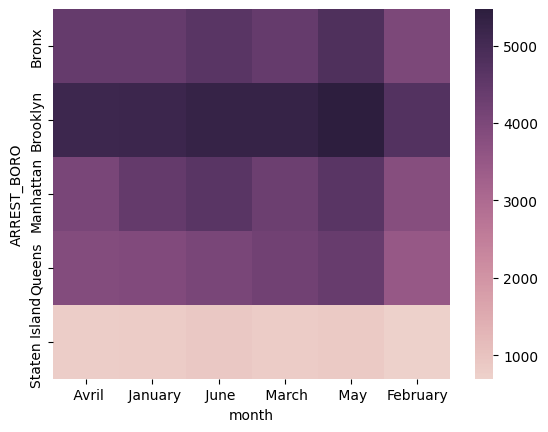

In [85]:
sns.heatmap(boro_monthly_offense,cmap=sns.cubehelix_palette(as_cmap=True));

In [103]:
# In which districts were the most crimes commmitted on yearly basis?
# Try and use everything you've learned in this video to answer this question.
# Feel free to use functions, tables and other visuals.

#district_and_year = nypdarrest.groupby(['Community Districts', 'month']).count()['ARREST_KEY'].unstack()

#sns.heatmap(district_and_year, cmap=sns.cubehelix_palette(as_cmap=True));

#district_and_year.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Types of Crimes")

In [58]:
# What is the highest offense made by age group?

nypdarrest.groupby('AGE_GROUP').count()['ARREST_KEY']

AGE_GROUP
18-24    19682
25-44    64823
45-64    22058
65+       1766
<18       4242
Name: ARREST_KEY, dtype: int64

<Axes: title={'center': 'Total Arrest Made by Age Group'}>

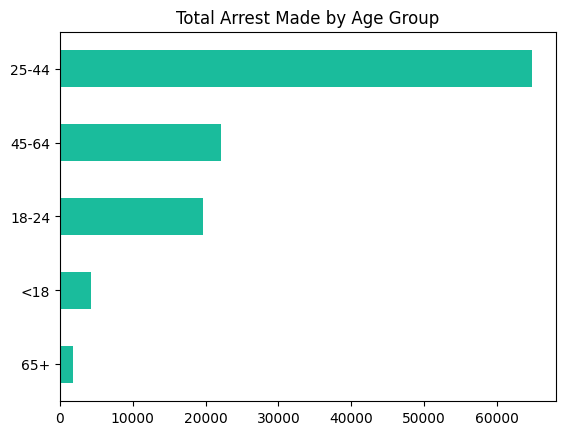

In [111]:
nypdarrest['AGE_GROUP'].value_counts().sort_values().plot(kind="barh", color = '#1ABC9C', title = 'Total Arrest Made by Age Group')

In [19]:
# How many offenses made by gender?

nypdarrest.replace({'PERP_SEX': {'F':'Female', 'M': 'Male','U':'Unknow'}}, inplace=True)
nypdarrest.groupby('PERP_SEX').count()['ARREST_KEY']

PERP_SEX
Female    18975
Male      90596
Unknow     3000
Name: ARREST_KEY, dtype: int64

<Axes: title={'center': 'Arrest occured by Gender'}, xlabel='Gender'>

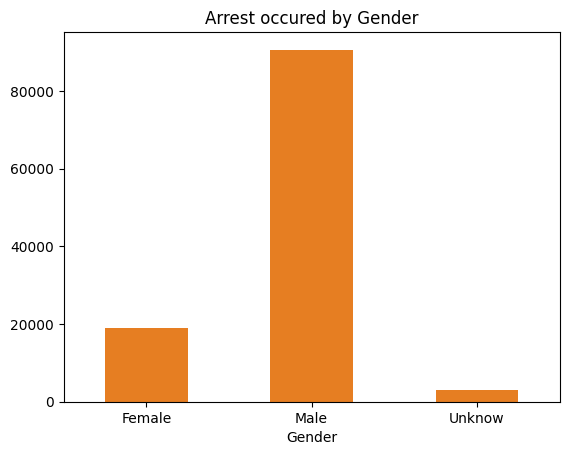

In [20]:
nypdarrest.groupby('PERP_SEX').size().plot(kind = 'bar', title ='Arrest occured by Gender', color = '#E67E22', xlabel = 'Gender',rot=0)

In [60]:
# How many offenses made by race?

nypdarrest.groupby('PERP_RACE').count()['ARREST_KEY']

PERP_RACE
AMERICAN INDIAN/ALASKAN NATIVE      356
ASIAN / PACIFIC ISLANDER           5995
BLACK                             54083
BLACK HISPANIC                    10612
UNKNOWN                            2019
WHITE                             10970
WHITE HISPANIC                    28536
Name: ARREST_KEY, dtype: int64

<Axes: title={'center': 'Types of Arrest Occurent by Race'}>

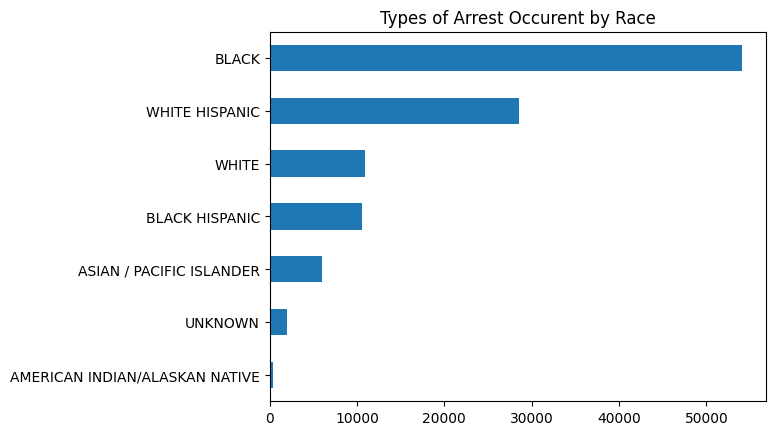

In [21]:
nypdarrest.PERP_RACE.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Types of Arrest Occurent by Race")

In [124]:
nypdarrest.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column',
       'Community Districts', 'Borough Boundaries', 'City Council Districts',
       'Police Precincts', 'Zip Codes', 'year', 'month'],
      dtype='object')